# Decision Tree
Decision Trees (DTs) are a **non-parametric supervised learning method** which means it doesn't make strong assumption about the form of mapping function. It is used for **classification** and **regression**. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be **visualised**.


* Requires **little data preparation**. Other techniques often require data normalisation, dummy variables need to be created. With decision tree we don't need to deal with these overhead.


* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree. The time complexity of predict function is O(logn).


* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. 


* Able to handle multi-output problems.


* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.


* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model. This simply means that the quality of split can be validated by test statistics P Value.


* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated. This means unlike Logistic Regression where were assume the data is is normally distributed. Decision tree don't have such constraints.

## The disadvantages of decision trees include:

* Decision-tree learners can **create over-complex trees** that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.


* Decision trees can be **unstable** because small variations in the data might result in a completely different tree being generated because Decision Tree has high variance. This problem is mitigated by using decision trees within an ensemble.


* The problem of learning an optimal decision tree is known to be **NP-complete** under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.


* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems because decision trees splits space into rectangular regions. Therefore they are not pretty good with this kind of distributions.


* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

In [76]:
# import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
from dtreeviz.trees import dtreeviz
plt.style.use("ggplot")

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [3]:
# Data Acquisition
iris = load_iris()
iris_df = pd.DataFrame(data = iris["data"],
                      columns = iris["feature_names"])
iris_df["target"] = iris["target"]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# Data Preparation
X = iris_df.drop("target", axis = 1)
y = iris_df["target"]

In [41]:
dt = DecisionTreeClassifier(random_state = 30) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4, stratify = y)

# train
dt.fit(X_train, y_train)

# test
y_pred = dt.predict(X_test)
print("Prediction on test data: ", y_pred)

# Prediction Probability
pred_prob = dt.predict_proba(X_test)
print("Prediction Probability on test data:\n", pred_prob)


# Accuracy
print("Accuracy on train data: ", accuracy_score(y_train, dt.predict(X_train)))
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))

Prediction on test data:  [1 0 1 1 2 0 2 0 0 1 2 0 2 1 0 2 0 2 0 2 2 0 1 2 2 1 0 1 2 1]
Prediction Probability on test data:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Accuracy on train data:  1.0
Accuracy on test data:  0.9666666666666667


Since the test accuracy is lesser than train accuracy, the model is **overfitting**.

### Minimal Cost-Complexity Pruning
By default, the Decision Tree function doesn’t perform any pruning and allows the tree to grow as much as it can. We get an accuracy score of 0.95 and 0.63 on the train and test part respectively as shown below. We can say that our model is Overfitting i.e. memorizing the train part but is not able to perform equally well on the test part.

Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.
In simpler terms, cost complexity is a threshold value. The model split a node further into its child node only when the overall impurity of the model is improved by a value greater than this threshold else it stops.

When CCP values are low, a higher number of nodes are created. Higher the nodes, the higher is the depth of the tree as well.

In [31]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

alphas

array([0.        , 0.01585366, 0.01623932, 0.2853867 , 0.33333333])

We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.

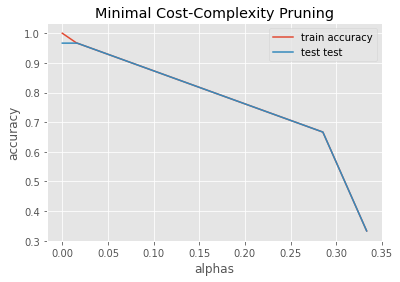

In [72]:
acc_train, acc_test = [], []

for i in alphas:
    dt_prune = DecisionTreeClassifier(ccp_alpha=i)
    dt_prune.fit(X_train, y_train)
    
    y_train_pred = dt_prune.predict(X_train)
    y_test_pred = dt_prune.predict(X_test)
    
    acc_train.append(accuracy_score(y_train, y_train_pred))
    acc_test.append(accuracy_score(y_test, y_test_pred))

plt.plot(alphas, acc_train, label = 'train accuracy')
plt.plot(alphas, acc_test, label = 'test test')
plt.title("Minimal Cost-Complexity Pruning")
plt.xlabel("alphas")
plt.ylabel("accuracy")
plt.legend()
plt.show()

ccp_alpha = 0.025 would genrate best prunned tree.

In [74]:
dt_optimal = DecisionTreeClassifier(random_state = 30, ccp_alpha = 0.025) 

# train
dt_optimal.fit(X_train, y_train)

# Accuracy
print("Accuracy on train data: ", accuracy_score(y_train, dt_optimal.predict(X_train)))
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))

Accuracy on train data:  0.9583333333333334
Accuracy on test data:  0.9666666666666667


## Visualize Tree

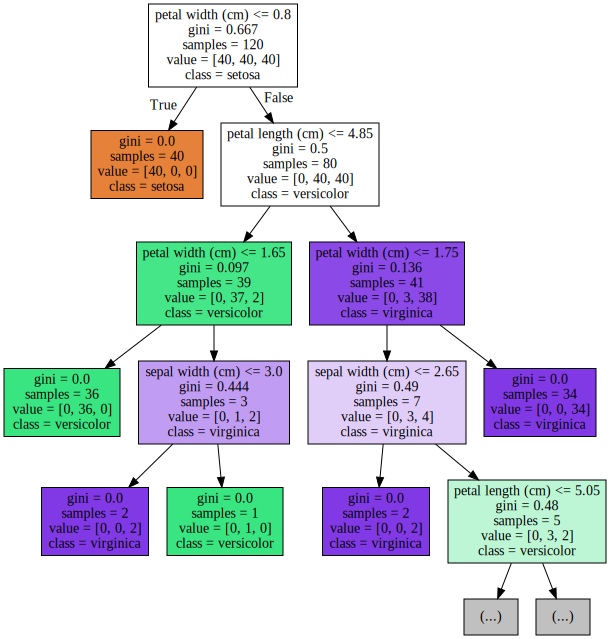

In [45]:
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True,
                                max_depth = 4)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

The tree can be visualized in a different manner also which i generally prefer.

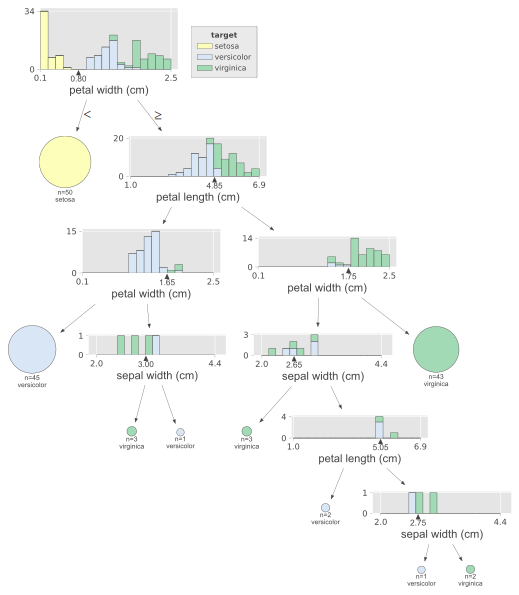

<Figure size 1080x1080 with 0 Axes>

In [46]:
plt.figure(figsize = (15, 15))
viz = dtreeviz(dt, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names),
                ticks_fontsize = 11,
                title_fontsize = 20,
                label_fontsize = 15)

viz

Alternatively, the tree can also be exported in textual format with the function export_text. This method doesn’t require the installation of external libraries and is more compact:

In [47]:
r = export_text(dt, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.85
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |--- class: 1
|   |--- petal length (cm) >  4.85
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- sepal width (cm) <= 2.65
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  2.65
|   |   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |   |--- sepal width (cm) <= 2.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal width (cm) >  2.75
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- class: 2



When the training sample is less then **cross validation**

In [48]:
cv_score = cross_val_score(dt, X, y, cv = 5)
mean_acc = cv_score.mean()
std_acc = cv_score.std()

print("Accuracy: {0} +/- {1}".format(np.round(mean_acc, 3), np.round(std_acc, 3)))

Accuracy: 0.967 +/- 0.037


## Visualize Decision Boundary

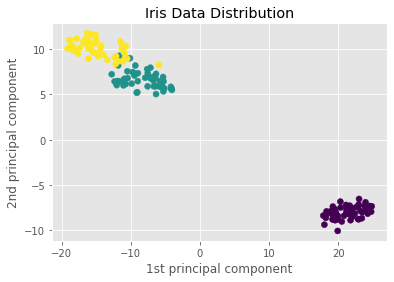

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components= 2, learning_rate = 200)
reduced_tsne_df = tsne.fit_transform(X)

plt.scatter(reduced_tsne_df[:, 0], reduced_tsne_df[:, 1], c = iris["target"])
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Iris Data Distribution")
plt.show()

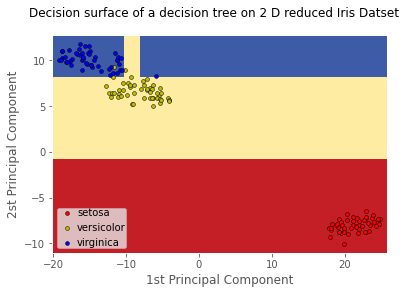

In [60]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# We only take the two corresponding features
x = reduced_tsne_df
y = iris.target

# Train
clf = DecisionTreeClassifier().fit(x, y)

x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("1st Principal Component")
plt.ylabel("2st Principal Component")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree on 2 D reduced Iris Datset")
plt.legend(loc='lower left', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

### Feature Importance

CART offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

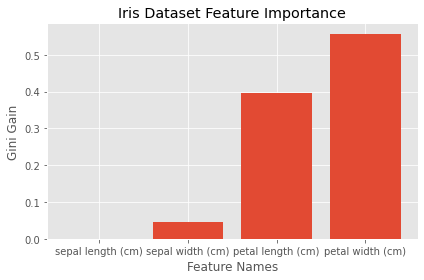

In [62]:
importance = dt.feature_importances_
plt.bar(iris['feature_names'], importance)
plt.xlabel("Feature Names")
plt.ylabel("Gini Gain")
plt.title("Iris Dataset Feature Importance")
plt.tight_layout()
plt.show()

### Comparision between different splitting criterions
Change in impurity for different probability values

<Figure size 432x288 with 0 Axes>

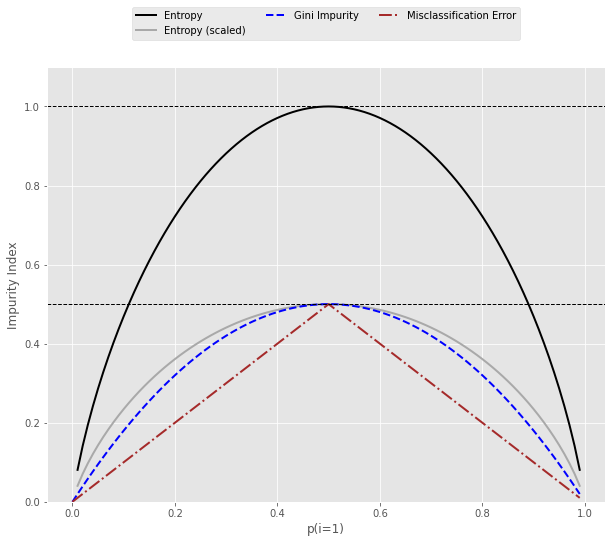

In [71]:
#-----Calculating Gini Index
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

#-----Calculating Entropy
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

#-----Calculating Classification Error
def classification_error(p):
    return 1 - np.max([p, 1 - p])

#----Creating a Numpy Array of probability values from 0 to 1, with an increment of 0.01
x = np.arange(0.0, 1.0, 0.01)

#---Obtaining Entropy for different values of p
ent = [entropy(p) if p != 0 else None for p in x]

#---Obtaining scaled entropy
sc_ent = [e*0.5 if e else None for e in ent]

#--Classification Error
err = [classification_error(i) for i in x]

#--Plotting
fig = plt.figure();
plt.figure(figsize=(10,8));
ax = plt.subplot(111);
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)','Gini Impurity',
                                                        'Misclassification Error'],['-', '-', '--', '-.'],
                          ['black', 'darkgray','blue', 'brown', 'cyan']):
    line = ax.plot(x, i, label=lab,
    linestyle=ls, lw=2, color=c)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

By Default Gini Gain is the splitting criterion in scikit learn api, the reason being the it is computationally efficient because we don't need to calculate log values for computing gini gain unlike in the computation of information gain.

But the reality is there is no statistical difference between Gini or Information gain criterion.

### Time Complexity
O(NMD) which is O(NMlogN)  and O(N2k).
<br> where N = Number of training sample</b>
<br>M = Number of Features</br>
<br>D = Depth of Tree</br>

## Decision Tree for Regression

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
salary = pd.read_csv('./Datasets/Position_Salaries.csv')
salary.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [65]:
X_sal = salary['Level']
y_sal = salary["Salary"]

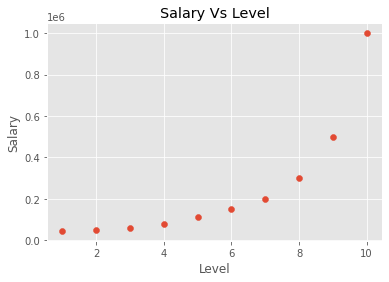

In [66]:
plt.scatter(X_sal, y_sal)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Salary Vs Level")
plt.show()

The input output relation is non linear.

In [78]:
dtr = DecisionTreeRegressor(random_state=0)
lr = LinearRegression()

# Fit the data
dtr.fit(X_sal.values.reshape(-1, 1), y_sal.values)
lr.fit(X_sal.values.reshape(-1, 1), y_sal.values)

LinearRegression()

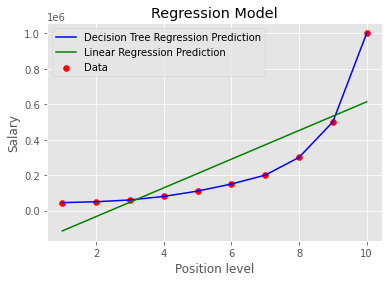

In [80]:
plt.scatter(X_sal, y_sal, color = 'red', label = "Data")
plt.plot(X_sal, dtr.predict(X_sal.values.reshape(-1, 1)), color = 'blue', label = "Decision Tree Regression Prediction")
plt.plot(X_sal, lr.predict(X_sal.values.reshape(-1, 1)), color = 'green', label = "Linear Regression Prediction")
plt.title('Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend()
plt.show()

Decision Tree Regression Prediction has captured the non linearity in data nice. This fitting is much better than linear regression. 

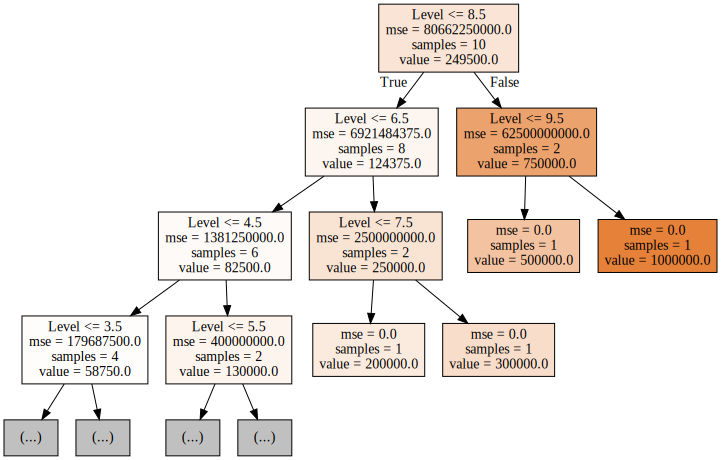

In [69]:
# DOT data
dot_data = tree.export_graphviz(dtr, out_file=None, 
                                feature_names=['Level'],  
                                class_names=['Salary'],
                                filled=True,
                                max_depth = 3)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### Tips on practical use
* Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.

* Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.

* Understanding the decision tree structure will help in gaining more insights about how the decision tree makes predictions, which is important for understanding the important features in the data.

* Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.

* Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.

* Use min_samples_split or min_samples_leaf to ensure that multiple samples inform every decision in the tree, by controlling which splits will be considered. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data. Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. While min_samples_split can create arbitrarily small leaves, min_samples_leaf guarantees that each leaf has a minimum size, avoiding low-variance, over-fit leaf nodes in regression problems. For classification with few classes, min_samples_leaf=1 is often the best choice.

* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.

* If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.

* All decision trees use np.float32 arrays internally. If training data is not in this format, a copy of the dataset will be made.

* If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.